In [1]:
import pandas as pd
import numpy as np

## 1. Data Cleaning & Preprocessing

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [2]:
melb = pd.read_csv('melb_data.csv')

In [3]:
# Batasan soal pada ujian, diambil 5000 data pertama. Dataset yang akan digunakan untuk modeling :
df = melb.loc[0:4999]

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  BuildingArea   2838 non-null   float64
 15  YearBuilt      3224 non-null   float64
 16  CouncilArea    5000 non-null   object 
 17  Lattitude      5000 non-null   float64
 18  Longtitu

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,2838.000000,3224.000000,5000.000000,5000.000000,5000.000000
mean,2.888800,1.137445e+06,8.698000,3099.18240,2.845400,1.535000,1.556400,456.732000,150.624031,1960.598325,-37.814162,144.991280,7141.064800
std,0.963649,6.715913e+05,3.396407,60.11998,0.955239,0.716434,0.920972,1343.621956,178.182062,37.699725,0.063795,0.072481,3218.122772
min,1.000000,8.500000e+04,1.600000,3000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-37.946200,144.807500,394.000000
25%,2.000000,6.800000e+05,5.900000,3046.00000,2.000000,1.000000,1.000000,145.000000,90.000000,1930.000000,-37.860825,144.934875,4675.000000
50%,3.000000,9.500000e+05,8.800000,3081.00000,3.000000,1.000000,1.000000,347.500000,125.000000,1960.000000,-37.799700,144.997700,6923.000000
75%,3.000000,1.417062e+06,11.200000,3148.00000,3.000000,2.000000,2.000000,619.250000,176.000000,1997.250000,-37.765200,145.049500,9264.000000
max,8.000000,6.500000e+06,15.000000,3207.00000,9.000000,8.000000,8.000000,75100.000000,6791.000000,2018.000000,-37.694900,145.143800,17496.000000


In [27]:
# Pengecekan missing value
df_list = []
for i in df.columns:
    df_list.append([i, 
                       df[i].dtype, 
                       df[i].isna().sum(), 
                        round((df[i].isna().sum()/len(df[i]))*100,2),
                       df[i].nunique(), list(df[i].drop_duplicates().values)])

df_desc = pd.DataFrame(columns = ['Feature Name', 'Type', 'Sum of Null', 'Nul Percentage', 'Unique Values', 'Unique  Samples'], data = df_list)

df_desc

,Feature Name,Type,Sum of Null,Nul Percentage,Unique Values,Unique Samples
0,Suburb,object,0,0.00,84,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,0.00,4956,"[85 Turner St, 25 Bloomburg St, 5 Charles St, ..."
2,Rooms,int64,0,0.00,8,"[2, 3, 4, 1, 6, 5, 8, 7]"
3,Type,object,0,0.00,3,"[h, u, t]"
4,Price,float64,0,0.00,1400,"[1480000.0, 1035000.0, 1465000.0, 850000.0, 16..."
5,Method,object,0,0.00,5,"[S, SP, PI, VB, SA]"
6,SellerG,object,0,0.00,158,"[Biggin, Nelson, Jellis, Greg, LITTLE, Collins..."
7,Date,object,0,0.00,35,"[3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 7..."
8,Distance,float64,0,0.00,68,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,0,0.00,70,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


In [73]:
from scipy import stats
from scipy.stats import mannwhitneyu

In [75]:
normal, p = stats.normaltest(df['BuildingArea'].dropna())
# h0: X comes from normal distribution
# h1: X does not come from normal distribution
if p < 0.05:
    print('BuildingArea does not come from normal distribution')
else:
    print('BuildingArea comes from normal distribution')

BuildingArea does not come from normal distribution


Terdapat missing value pada feature BuildingArea dan YearBuilt. Feature YearBuilt akan diisi dengan modus, sedangkan Feature BuildingArea akan diisi dengan median.

(Data Cleaning dan Preprocessing dilanjutkan dibagian setelah EDA, sebelum modeling)

In [23]:
df['Date']

array(['3/12/2016', '4/02/2016', '4/03/2017', '4/06/2016', '7/05/2016',
       '8/10/2016', '12/11/2016', '13/08/2016', '14/05/2016',
       '15/10/2016', '16/07/2016', '17/09/2016', '18/03/2017',
       '18/06/2016', '19/11/2016', '22/08/2016', '24/09/2016',
       '25/02/2017', '26/07/2016', '27/11/2016', '28/05/2016',
       '30/07/2016', '3/09/2016', '6/08/2016', '7/11/2016', '10/09/2016',
       '10/12/2016', '11/02/2017', '16/04/2016', '22/05/2016',
       '23/04/2016', '12/06/2016', '27/06/2016', '28/08/2016',
       '11/03/2017'], dtype=object)

## B. EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

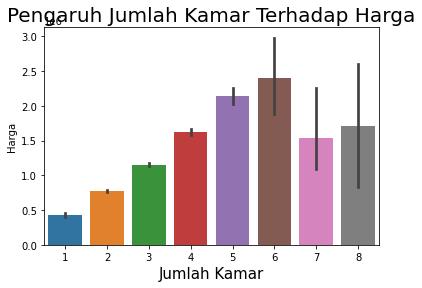

In [30]:
plt.figure()
sns.barplot(x = "Rooms", y = "Price", data = df)
plt.title('Pengaruh Jumlah Kamar Terhadap Harga', fontsize=20)
plt.xlabel('Jumlah Kamar', fontsize=15)
plt.ylabel('Harga')
plt.show()

In [ ]:
# Jumlah 6 kamar dalam suatu rumah paling mahal.

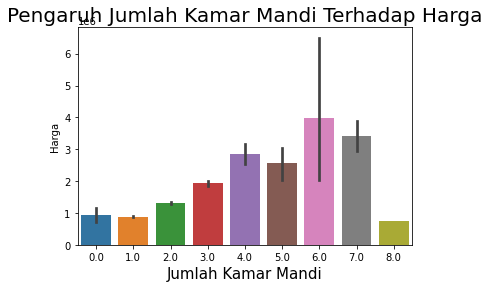

In [66]:
plt.figure()
sns.barplot(x = "Bathroom", y = "Price", data = df)
plt.title('Pengaruh Jumlah Kamar Mandi Terhadap Harga', fontsize=20)
plt.xlabel('Jumlah Kamar Mandi', fontsize=15)
plt.ylabel('Harga')
plt.show()

In [67]:
# Jumlah 6 kamar mandi dalam suatu rumah paling mahal.

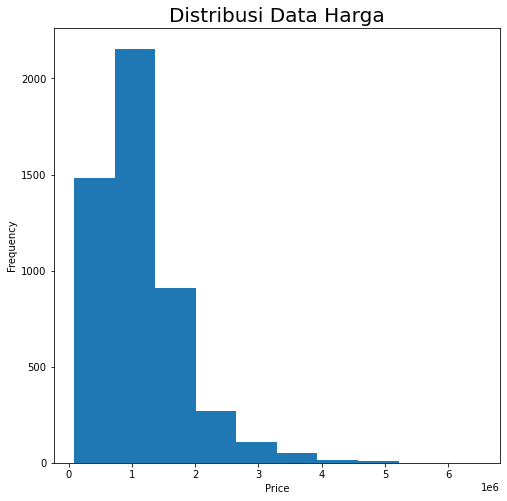

In [14]:
plt.figure(figsize = (8,8))
plt.hist(df['Price'])
plt.title('Distribusi Data Harga', size = 20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [31]:
melb['Price'].mean() # Rata - rata Harga rumah adalah 1075684

1075684.079455081

In [32]:
melb['Price'].mode() # dengan modus 1100000

0    1100000.0
dtype: float64

In [33]:
df['Price'].median() # dan median 950000

950000.0

Harga Berdistribusi skew right

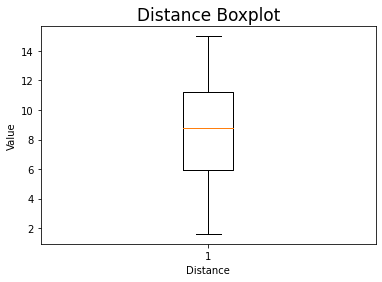

In [34]:
plt.boxplot(df['Distance'])
plt.title('Distance Boxplot', size = 17)
plt.xlabel('Distance')
plt.ylabel('Value')
plt.show()

berdasarkan boxplot diatas, maka distance perumahan pada data tersebut tidak ada outlier.

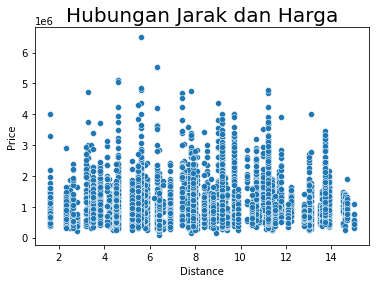

In [68]:
plt.figure()
sns.scatterplot(x = "Distance", y = "Price", data = df)
plt.title('Hubungan Jarak dan Harga', fontsize=20)
plt.show()

In [69]:
# Semakin dekat dengan CBD, maka Harga cenderung semakin mahal

<AxesSubplot:xlabel='YearBuilt'>

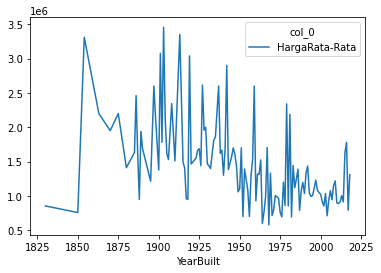

In [26]:
data = pd.crosstab(index = df['YearBuilt'], columns = "HargaRata-Rata", values = df['Price'], aggfunc='mean').round(2)
data.plot(kind='line')

In [47]:
data["HargaRata-Rata"].min()

578875.0

In [55]:
data["HargaRata-Rata"].max()

3455000.0

Dari tahun 1825 sampai tahun 2025, Harga Rata-rata tahunan paling mahal berada pada tahun 1900 dengan harga 3455000 dan harga minimum 578875 pada sekitar tahun 1960. Terjadi lonjakan Harga pada tahun 1850.

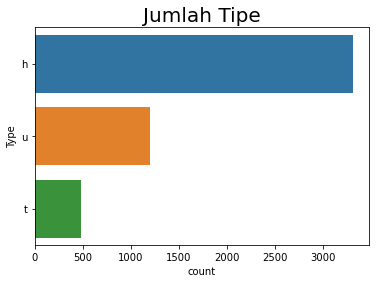

In [58]:
plt.figure()
sns.countplot(y = "Type", data = df)
plt.title('Jumlah Tipe', fontsize=20)
plt.show()

Jumlah Tipe yang paling banyak adalah tipe h - house,cottage,villa, semi,terrace.
Sedangkan jumlah tipe yang paling sedikit adalah t. Maka Real Estate dapat melakukan promosi lebih gencar untuk penjualan townhouse

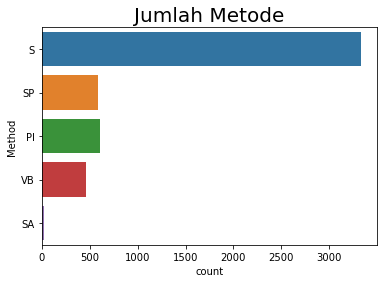

In [59]:
plt.figure()
sns.countplot(y = "Method", data = df)
plt.title('Jumlah Metode', fontsize=20)
plt.show()

Jumlah Metode yang paling sering digunakan adalah property sold

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


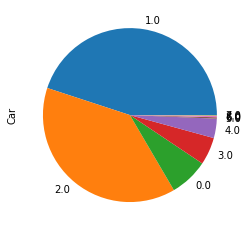

In [60]:
df['Car'].value_counts(normalize=True).plot(kind='pie')
plt.show()

In [61]:
df['Car'].value_counts()

1.0    2248
2.0    1924
0.0     359
3.0     256
4.0     180
5.0      13
6.0      12
8.0       5
7.0       3
Name: Car, dtype: int64

Number of carspots yang paling banyak adalah 1

## C. Model Building & Hyper-parameter Tuning

#### A. Data Cleaning dan Prep

1. Terdapat missing value pada 
>- feature YearBuilt diisi dengan simple imputer most_frequent karena datanya categorical
>- feature BuildingArea diisi median dengan simple imputer

2. Drop column 
>- Suburb, Address, Postcode, CouncilArea, Lattitude, Longtitude karena akan digunakan Regionname untuk mewakili tempat/letak.
>- Propertycount karena jumlah properti dalam suatu suburb tidak berpengaruh karena sudah dipilih Regionname untuk mewakili tempat/letak.
>- Date, SellerG karena tidak berpengaruh.

3. Encoding:
>- YearBuilt : binary
>- Type : onehot
>- Regionname : binary
>- Method : binary

- Dilakukan OneHot encoding karena datanya nominal dan jumlah category dalam featurenya sedikit
- Dilakukan Binary encoding karena datanya nominal dan jumlah category dalam featurenya banyak

4. Model
> Akan dicoba model machine learning non parametric, yaitu DTC, dan KNN

In [82]:
newdf = df.drop(['Suburb', 'Address', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Date', 'SellerG'], axis =1)
newdf.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan


In [141]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV 

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.feature_selection import RFE

from statsmodels.api import OLS

import statsmodels.api as sm

In [112]:
# Encoding

# melakukan impute modus dan binary encoding, untuk feature YearBuilt
binary_fill = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# column transformer
transformer = ColumnTransformer([
    ('imputenum', SimpleImputer(strategy='median'), ['BuildingArea']), # melakukan impute median untuk feature BuildingArea
    ('onehot', OneHotEncoder(drop='first'), ['Type']),
    ('binary_fill', binary_fill, ['YearBuilt']),
    ('binary', ce.BinaryEncoder(),['Regionname', 'Method'])
], remainder='passthrough')

In [114]:
# Split dataset
X = newdf.drop(columns=['Price'])
y = newdf['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2020
)

## Modeling

In [119]:
# model inializing dtc
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=2021, class_weight='balanced')
rfe = RFE(estimator=dtc)

all_in_pipeline = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('clf', dtc)
])

In [125]:
all_in_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputenum',
                                                  SimpleImputer(strategy='median'),
                                                  ['BuildingArea']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Type']),
                                                 ('binary_fill',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['YearBuilt']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Regionname', 'Method'])])),
               

In [145]:
import math

y_pred = all_in_pipeline.predict(X_test)

print(math.sqrt(mean_squared_error(y_test, y_pred))) # nilai rmse dari dtc
print(r2_score(y_test, y_pred)) # nilai r2 dari dtc

601499.421441592
0.11904488026669635


RMSE 601499 berarti akan ada selisih 601499 pada hasil prediksi dan aktualnya.

In [184]:
# cross validation dtc
skfold = StratifiedKFold(n_splits=10)

cvs_dtc = cross_val_score(
            all_in_pipeline, 
            X_train,y_train,
            cv=skfold,
            scoring='neg_root_mean_squared_error')

In [221]:
# model inializing knn
knn = KNeighborsClassifier(n_neighbors = 5)
rfe = RFE(estimator=knn)

knn_pipeline = Pipeline([
    ('transformer', transformer),
    ('clf', knn)
])

In [222]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputenum',
                                                  SimpleImputer(strategy='median'),
                                                  ['BuildingArea']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Type']),
                                                 ('binary_fill',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['YearBuilt']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Regionname', 'Method'])])),
               

In [223]:
# knn
import math

y_pred = knn_pipeline.predict(X_test)

print(math.sqrt(mean_squared_error(y_test, y_pred))) # nilai rmse dari knn
print(r2_score(y_test, y_pred)) # nilai r2 dari knn

689881.0030614482
-0.15886201599337912


Model yang paling baik adalah model DTC, karena nilai RMSE yang lebih kecil. Jadi dalam melakukan model evaluation, juga dipilih RMSE.
RMSE 689881 berarti akan ada selisih 689881 pada hasil prediksi dan aktualnya.

In [216]:
# cross validation knn
skfold = StratifiedKFold(n_splits=10)

cvs_knn = cross_val_score(
            knn_pipeline, 
            X_train,y_train,
            cv=skfold,
            scoring='neg_root_mean_squared_error')

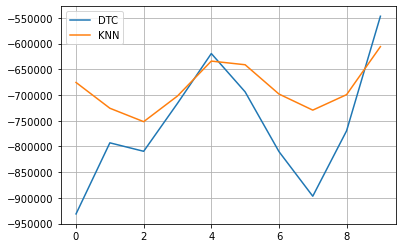

In [217]:
import matplotlib.pyplot as plt

plt.plot(range(len(cvs_dtc)), cvs_dtc, label='DTC')
plt.plot(range(len(cvs_knn)), cvs_knn, label='KNN')
# plt.plot(range(len(tree_cv)), tree_cv, label='DTC')
plt.grid()
plt.legend()
plt.show()

In [206]:
print(cvs_dtc.mean())
print(cvs_knn.mean())

-758543.1694849193
-686233.003092061


In [207]:
print(cvs_dtc.std())
print(cvs_knn.std())

112050.23485448267
44261.36280158372


Berdasarkan standard deviasi dari cross val score, model dtc lebih besar. Berdasarkan grafik, dapat dilihat juga dtc kurang stabil.
Model DTC ini juga termasuk Underfitting karena nilai r2 yang hanya 0.11 (sangat jauh dari 1) sehingga tidak merepresentasikan data dengan baik, error training dan testing buruk.

## D. Model Evaluation

In [229]:
hyperparam_space = {
    'clf__max_depth': [2,3,4,5,6,7],
    'clf__min_samples_split': [4,5,6,7,8,9,10],
    'clf__criterion': ['entropy', 'gini'],
    'rfe__n_features_to_select': [None,5,6,7,8],
    'transformer__imputenum__strategy': ['median', 'mean']
}

In [230]:
# Hyperparameter Tuning Model DTC
random_search = RandomizedSearchCV(
    all_in_pipeline,
    param_distributions = hyperparam_space,
    n_iter=180,
    cv = StratifiedKFold(n_splits=5),
    scoring = 'neg_root_mean_squared_error',
    verbose = 1,
    n_jobs = -1
)


In [231]:
dtc_tuned = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [232]:
import math

y_pred_tuned = dtc_tuned.predict(X_test)

print(math.sqrt(mean_squared_error(y_test, y_pred_tuned))) # nilai rmse dari dtc
print(r2_score(y_test, y_pred_tuned)) # nilai r2 dari dtc

620142.9491271469
0.063587987182816


Setelah dilakukan tuning, model DTC mengalami peningkatan RMSE dan penurunan r2.
Sehingga model terbaik untuk memprediksi Harga Rumah adalah DTC tanpa dilakukan tuning (karena nilai RMSE yang paling kecil).

In [245]:
# hyperparam_spaceknn = {'n_neighbors':[5,6,7,8,9,10],
#           'leaf_size':[1,2,3,5],
#           'weights':['uniform', 'distance'],
#           'algorithm':['auto', 'ball_tree','kd_tree','brute'],
#           'n_jobs':[-1]}

In [246]:
# # Hyperparameter Tuning Model KNN
# random_search_knn = RandomizedSearchCV(
#     knn_pipeline,
#     param_distributions = hyperparam_spaceknn,
#     n_iter=180,
#     cv = StratifiedKFold(n_splits=5),
#     scoring = 'neg_root_mean_squared_error',
#     verbose = 1,
#     n_jobs = -1
# )


In [ ]:
# knn_tuned = random_search_knn.fit(X_train, y_train)

In [ ]:
# import math

# y_pred_knntuned = knn_tuned.predict(X_test)

# print(math.sqrt(mean_squared_error(y_test, y_pred_knntuned))) # nilai rmse dari knn
# print(r2_score(y_test, y_pred_knntuned)) # nilai r2 dari knn